In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definition of paths
data_dir = os.path.join(os.getcwd(), '../Dataset')

raw_data_dir = os.path.join(data_dir, 'raw')
ids_mapping = os.path.join(raw_data_dir, 'IDS_mapping.csv')
diabetes_data = os.path.join(raw_data_dir, 'diabetic_data.csv')

mapping_data_dir = os.path.join(data_dir, 'Mapping')
os.makedirs(mapping_data_dir, exist_ok=True)

preprocessed_out_dir = os.path.join(data_dir, 'Preprocessed')
os.makedirs(preprocessed_out_dir, exist_ok=True)

admission_type_mapping_data = os.path.join(mapping_data_dir, 'admission_type_mapping.csv')
discharge_disposition_data = os.path.join(mapping_data_dir, 'discharge_disposition_mapping.csv')
admission_source_mapping_data = os.path.join(mapping_data_dir, 'admission_source_mapping.csv')

preprocessed_saved_filepath = os.path.join(preprocessed_out_dir, 'preprocessed.pkl')

In [3]:
df = pd.read_pickle(preprocessed_saved_filepath)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71515 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              71515 non-null  int64   
 1   patient_nbr               71515 non-null  int64   
 2   race                      71515 non-null  category
 3   gender                    71515 non-null  object  
 4   age                       71515 non-null  object  
 5   admission_type_id         71515 non-null  category
 6   discharge_disposition_id  71515 non-null  category
 7   admission_source_id       71515 non-null  category
 8   time_in_hospital          71515 non-null  int64   
 9   medical_specialty         71515 non-null  category
 10  num_lab_procedures        71515 non-null  int64   
 11  num_procedures            71515 non-null  int64   
 12  num_medications           71515 non-null  int64   
 13  number_outpatient         71515 non-null  int64   

## Categorical columns

In [5]:
categorical_columns = df.select_dtypes(include=['category']).columns
categorical_columns

Index(['race', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'change', 'diabetesMed', 'readmitted', 'age-binned',
       'max_glu_serum_measured', 'A1Cresult_measured', 'repaglinide_measured',
       'glimepiride_measured', 'rosiglitazone_measured',
       'pioglitazone_measured', 'glyburide_measured', 'glipizide_measured',
       'metformin_measured', 'insulin_measured'],
      dtype='object')

### Helper functions

In [18]:
def plotPieChart(df, columnName):
  plt.pie(df[columnName].value_counts(), labels=df[columnName].value_counts().index, autopct='%1.1f%%')
  plt.title(f"Distribution of {columnName}")
  plt.show()

In [19]:
def plotValueCounts(df, columnName):
  sns.countplot(x=columnName, data=df, order=df[columnName].value_counts().index)
  plt.xticks(rotation=90)
  plt.title(f"Distribution of {columnName}")
  plt.show()

In [21]:
def analyzeCategoricalColumn(df, columnName):
    print(f'Column name: {columnName}')
    print(f'Data type: {df[columnName].dtype}')
    
    print()
    uniqueValues = df[columnName].unique()
    print(f'Number of unique values: {len(uniqueValues)}')
    print()
    print('Unique values: ')
    print(f'{uniqueValues}')

    print()
    print('ValueCounts: ')
    print(df[columnName].value_counts())
    print()
    print('ValueCounts: Normalized')
    print(df[columnName].value_counts(normalize = True))

    print("Value count plot")
    plotValueCounts(df, columnName)

    print("Pie chart")
    plotPieChart(df, columnName)


### Column: 'race'

Column name: race
Data type: category

Number of unique values: 6

Unique values: 
['Caucasian', 'AfricanAmerican', 'Unknown', 'Other', 'Asian', 'Hispanic']
Categories (6, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'Unknown']

ValueCounts: 
race
Caucasian          53491
AfricanAmerican    12887
Unknown             1946
Hispanic            1517
Other               1177
Asian                497
Name: count, dtype: int64

ValueCounts: Normalized
race
Caucasian          0.747969
AfricanAmerican    0.180200
Unknown            0.027211
Hispanic           0.021212
Other              0.016458
Asian              0.006950
Name: proportion, dtype: float64
Value count plot


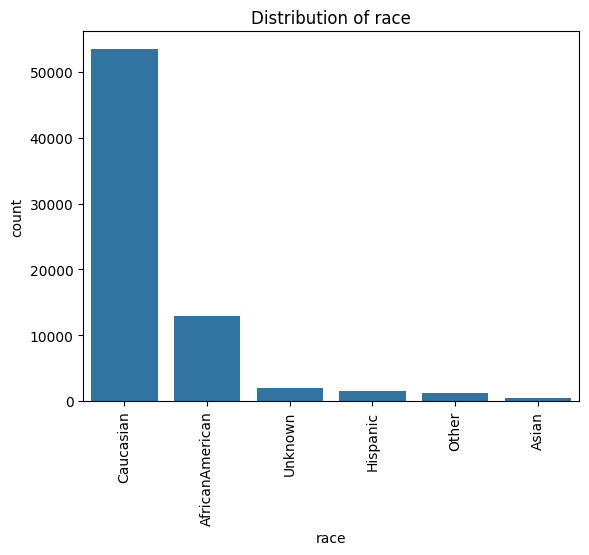

Pie chart


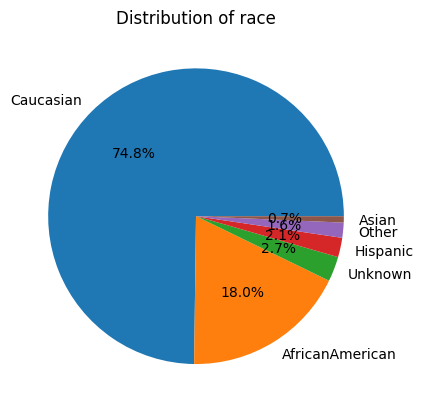

In [22]:
analyzeCategoricalColumn(df, 'race')

The Caucasian race dominates the data.

### Column: 'admission_type_id'

In [33]:
admtypid_df = pd.read_csv(admission_type_mapping_data)
admtypid_df.rename(columns={'description' : 'AdmissionType'}, inplace=True)

In [31]:
jdf = pd.merge(df, admtypid_df, on = 'admission_type_id', how ='inner')

Column name: AdmissionType
Data type: object

Number of unique values: 8

Unique values: 
[nan 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Not Available'
 'Not Mapped' 'Trauma Center']

ValueCounts: 
AdmissionType
Emergency        36488
Elective         13916
Urgent           13028
Not Available     3174
Not Mapped         291
Trauma Center       21
Newborn              9
Name: count, dtype: int64

ValueCounts: Normalized
AdmissionType
Emergency        0.545191
Elective         0.207928
Urgent           0.194660
Not Available    0.047425
Not Mapped       0.004348
Trauma Center    0.000314
Newborn          0.000134
Name: proportion, dtype: float64
Value count plot


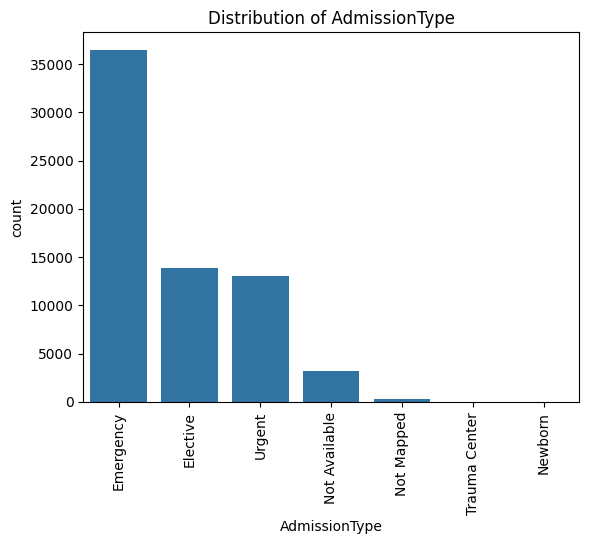

Pie chart


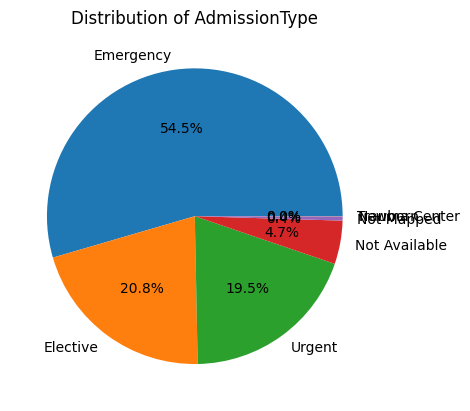

In [32]:
analyzeCategoricalColumn(jdf, 'AdmissionType')

Emergency admissions dominate the data.

### Column: 'discharge_disposition_id'

In [38]:
disdisp_df = pd.read_csv(discharge_disposition_data)
disdisp_df.rename(columns = {'description' : "DischargeDisposition"}, inplace=True)

In [39]:
jdf = pd.merge(df, disdisp_df, on = 'discharge_disposition_id', how = 'inner')

Column name: DischargeDisposition
Data type: object

Number of unique values: 26

Unique values: 
['Not Mapped' 'Discharged to home' 'Discharged/transferred to SNF'
 'Discharged/transferred to home with home health service'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to another type of inpatient care institution'
 'Expired' 'Left AMA'
 'Neonate discharged to another hospital for neonatal aftercare'
 'Hospice / medical facility' 'Discharged/transferred to ICF' nan
 'Discharged/transferred to home under care of Home IV provider'
 'Still patient or expected to return for outpatient services'
 'Hospice / home'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Discharged/transferred/referred another institution for outpatient services'
 'Discharged/transferred to another rehab fac including rehab units of a hospital .'
 'Discharged/transferred to a long term care hospital.'
 'Admitted as an inpatient to this hospital'
 'Di

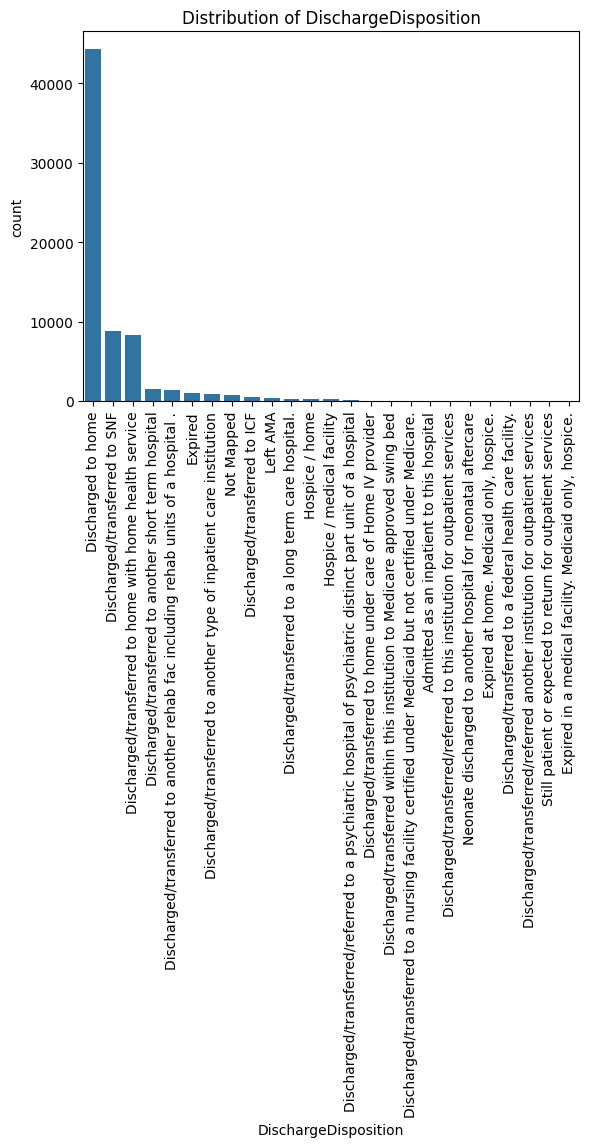

Pie chart


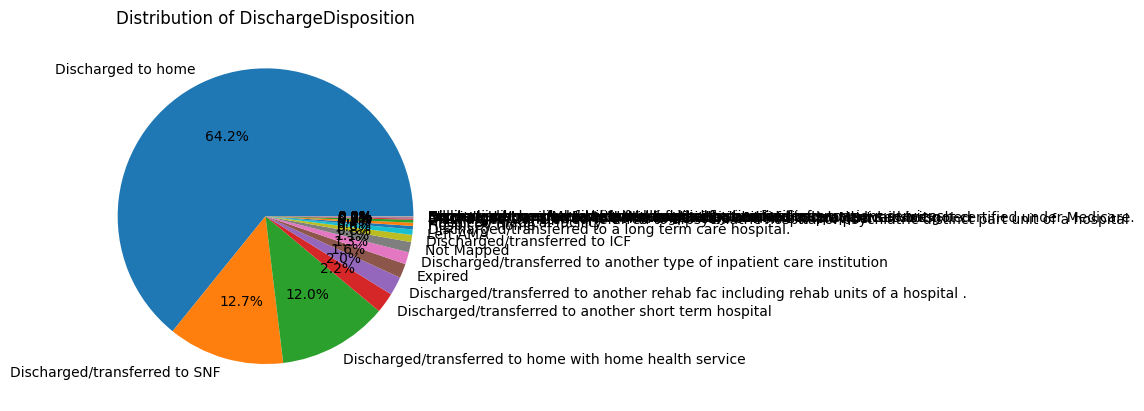

In [40]:
analyzeCategoricalColumn(jdf, 'DischargeDisposition')